In [1]:
import torch
from PIL import Image
import os
from torchvision import transforms
Image.MAX_IMAGE_PIXELS = 150000000

tile_size = 512

parent_dir = "rois2/"
img_dir = parent_dir + "images/"
tile_dir = parent_dir + "tiles/"
model_dir = parent_dir + "models/"
train_tile_dir = tile_dir + "train/"
val_tile_dir = tile_dir + "val/"

output labels from tile_roi_with_labels:
    format - x-center, y-center, width, height (all normalized)

dataloader & create dataset - image, label, box

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
import os
import numpy as np
import cv2
import pickle

from dataset_operations import load_inputs, read_mean_std, InputDataset, custom_collate_fn, get_transform

train_inputs = load_inputs(train_tile_dir)
val_inputs = load_inputs(val_tile_dir)
img_dir = parent_dir + "images/"


28621
6140


In [4]:
mean, std = read_mean_std(img_dir)

mean:  [0.77296131, 0.71338682, 0.68258603]
std:  [0.16751114, 0.19680141, 0.21965831]


define image augmentation

In [5]:
from torch.utils.data import DataLoader
mean
train_dataset = InputDataset(train_inputs, mean, std, trans = 'A')
val_dataset = InputDataset(val_inputs, mean,std,trans = 'T')

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0,collate_fn=custom_collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=0,collate_fn=custom_collate_fn)

print(len(train_dataloader))
print(len(val_dataloader))

895
192


In [6]:
pickle.dump(train_dataloader, open(model_dir + "train_dataloader.pkl", "wb"))
pickle.dump(val_dataloader, open(model_dir + "val_dataloader.pkl", "wb"))

check if imgs and boxes are consistent

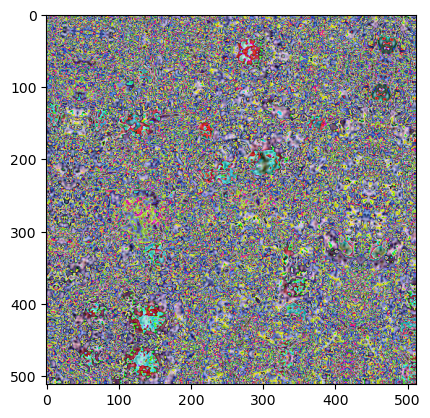

380 71 467 172


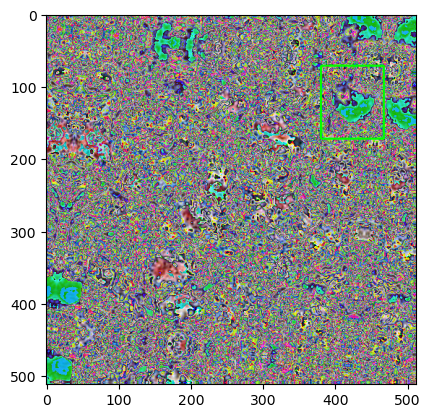

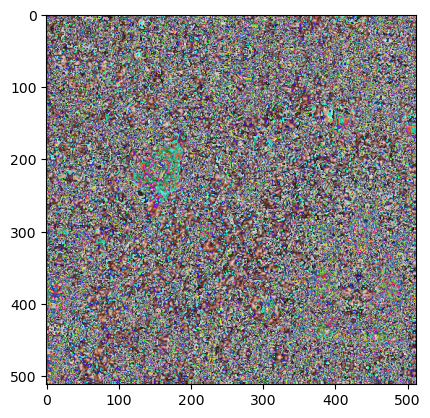

173 108 249 206


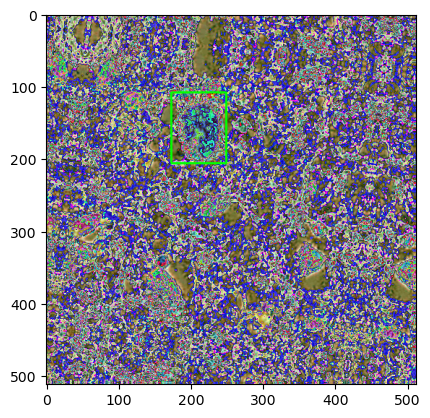

304 71 392 148


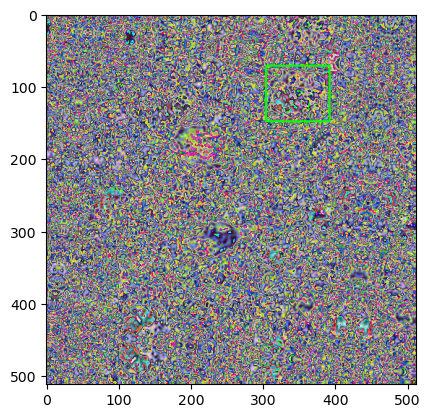

In [9]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, RandomSampler

sampler = RandomSampler(train_dataset, num_samples=5, replacement=False)

rand_dataloader = DataLoader(train_dataset, batch_size=1, sampler=sampler)

for item in rand_dataloader:
    img = item['image'][0].permute(1,2,0).clone().detach().numpy()
    # print(img.shape)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = (img * 255).astype(np.uint8)
    # print(img.shape)
    target = item['target']
    for b in range(target['boxes'].shape[0]):
        box = target['boxes'][b].squeeze().tolist()
        # print(box,len(box))
        if len(box) == 0:
            continue
        x1, y1, x2, y2 = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        print(x1, y1, x2, y2)
        cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2) 
    # cv2.imshow('image', img)
    # print(img.shape)
    # img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    

test iterating in train_dataloader

In [17]:
# for i, batch in enumerate(train_dataloader):
#     print (len(batch))
#     for item in batch:
#         print(item['image'].shape, item['target']['boxes'].shape, item['target']['labels'].shape)
#         if i >= 10:
#             break